In [2]:
#  IMPORTING SOME LABRARIES 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings ('ignore')

In [3]:
# IMPORTING DATA SET 
df = pd.read_csv ("C:/Users/ASUS/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

### IN THIS DATA SET THERE IS 1599 ROWS  AND 12 COLUMNS

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### BY SEEING THIS DATA SET THERE IS NO NULL VALUES PRESENT  

<AxesSubplot:>

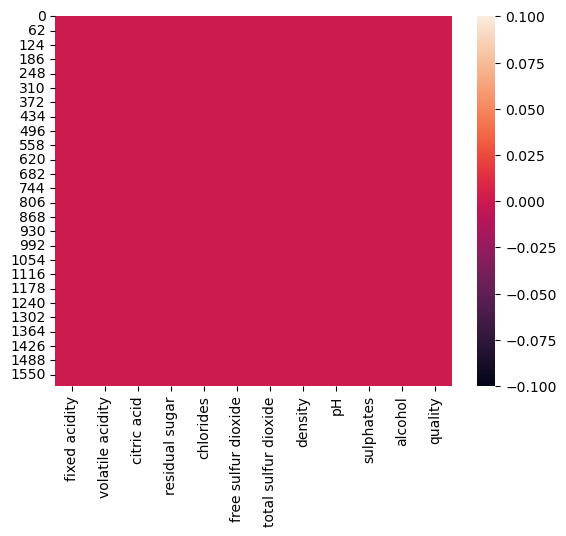

In [6]:
sns.heatmap(df.isnull())

### BY USING THIS HEATMAP ITS CONFIRMED THERE IS NO NULL VALUES IN DATA SET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### IN THIS DATASET  float64(11),  AND int64(1), AND memory usage: 150.0 KB

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### The summery of the dataset looks perfect there is no null values present
### The median values > mean values in 'fixed acidity' 'residual sugar' 'free sulfur dioxide' 'total sulfur dioxide' 'alcohol' 'quality' columns which means its left skewed 
### By looking the describe we can observed there is huge different between 75% and Max maybe there are outlier are present

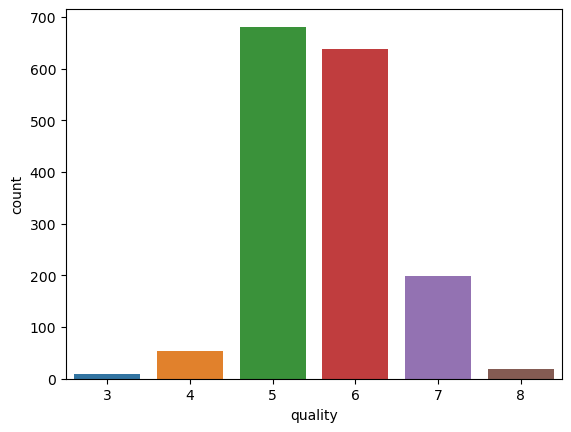

In [9]:
sns.countplot(df['quality'])
plt.show()

### There are six different quality values are present its start from 3 and end it to 8

In [11]:
#df.isnull().sum()
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

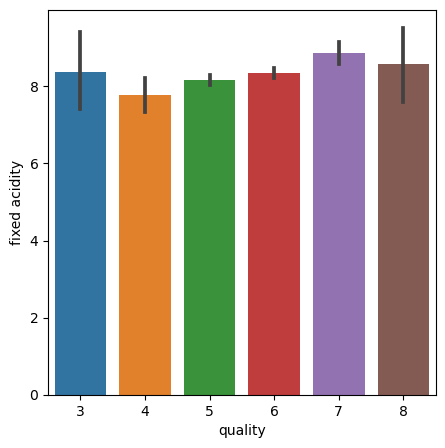

In [11]:
# PLOTING BAR PLOT QUALITY VS FIXED ACIDITY
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

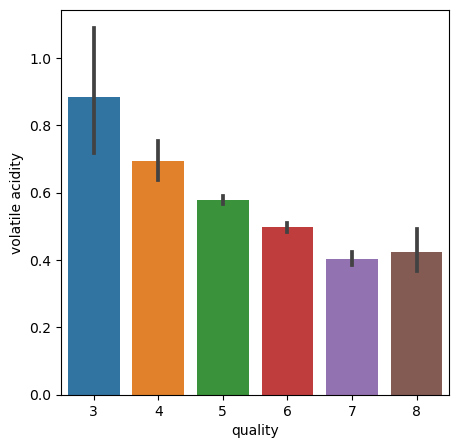

In [14]:
#PLOTING BAR PLOT QUALITY VS VOLATILE ACIDITY
plot = plt.figure(figsize=(5,5))
sns.barplot (x = 'quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

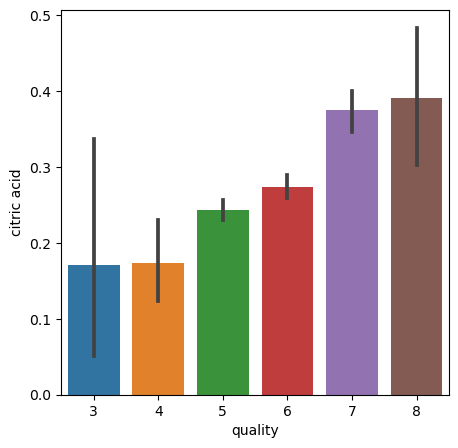

In [15]:
#PLOTING BAR PLOT QUALITY VS CITRIC ACID
plot = plt.figure (figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

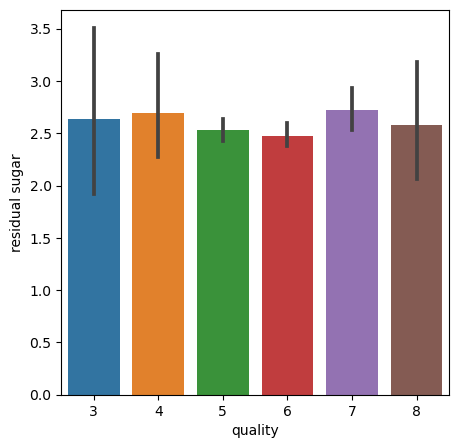

In [16]:
#PLOTING BAR PLOT QUALITY VS RESIDUAL SUGAR
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data=df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

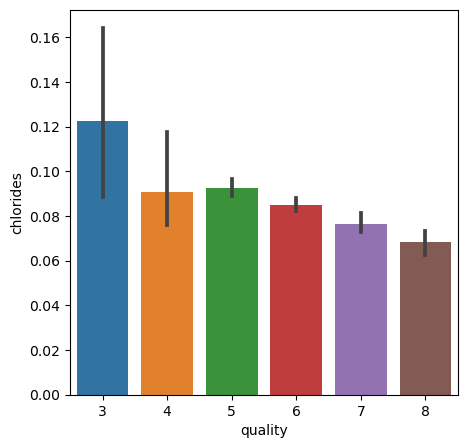

In [18]:
#PLOTING BAR PLOT QUALITY VS CHLORIDES
plot = plt.figure(figsize=(5,5))
sns.barplot (x='quality', y='chlorides', data=df)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

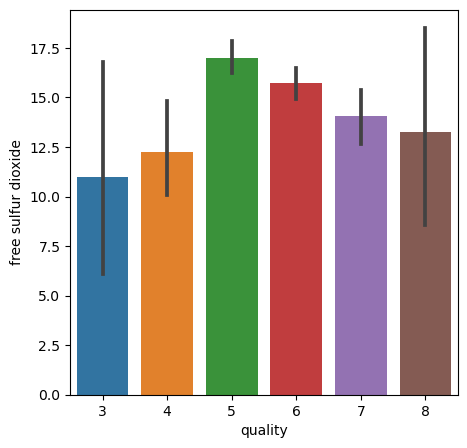

In [20]:
#PLOTING BAR PLOT QUALITY VS FREE SULFUR DIOXIDE
plot = plt.figure (figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

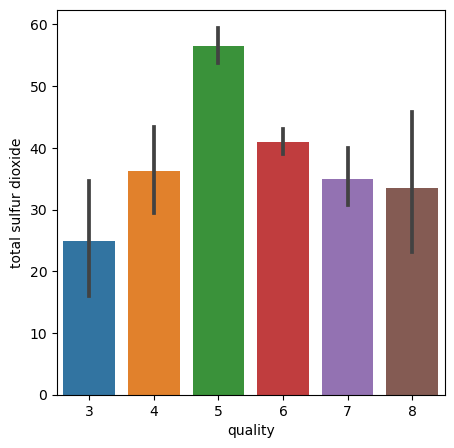

In [21]:
#PLOTING BAR PLOT QUALITY VS TOTAL SULFUR DIOXIDE
plot = plt.figure (figsize=(5,5))
sns.barplot(x='quality', y='total sulfur dioxide', data = df)

<AxesSubplot:xlabel='quality', ylabel='density'>

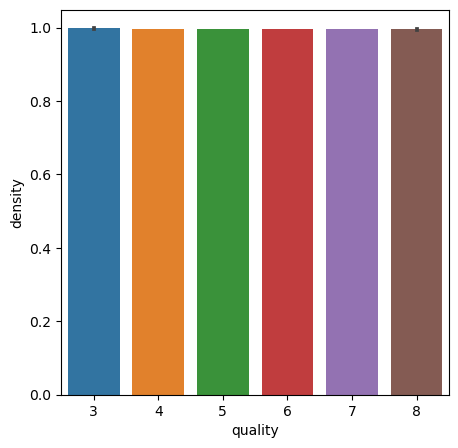

In [22]:
#PLOTING BAR PLOT QUALITY VS DENSITY
plot = plt.figure (figsize=(5,5))
sns.barplot(x='quality', y='density', data=df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

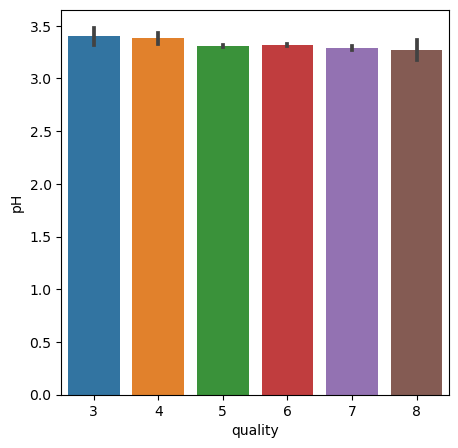

In [23]:
#PLOTING BAR PLOT QUALITY VS PH
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='pH', data=df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

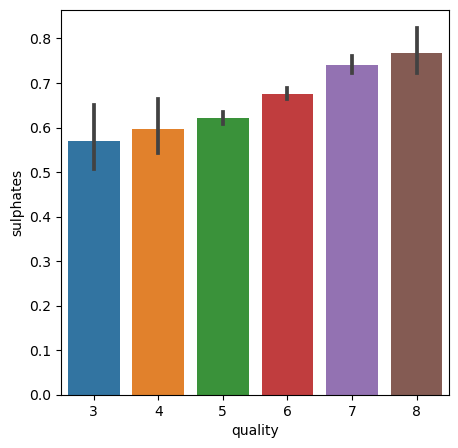

In [24]:
#PLOTING BAR PLOT QUALITY VS SULPHATES
plot = plt.figure (figsize=(5,5))
sns.barplot (x='quality', y='sulphates', data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

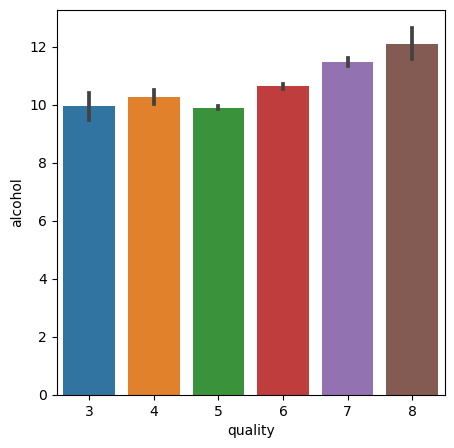

In [25]:
#PLOTING BAR PLOT QUALITY VS ALCOHOL
plot = plt.figure (figsize=(5,5))
sns.barplot (x='quality', y='alcohol', data=df)

### IN ALL COLUMNS OUTLIERS ARE PRESENTS

In [26]:
# FINDING CORRELATION BETWEEN LABEL & FEATURES 
correlation = df.corr()


<AxesSubplot:>

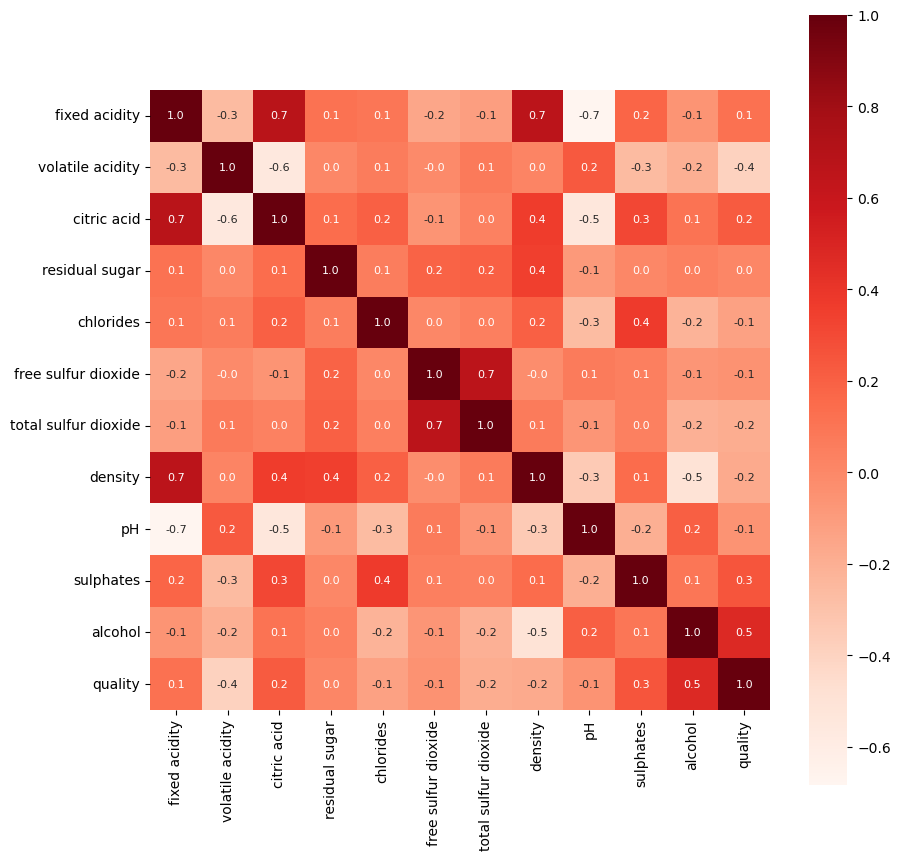

In [31]:
# FINDING CORRELATION BETWEEN LABEL & FEATURES 
plt.figure(figsize=(10,10))
sns.heatmap (correlation, cbar=True, square=True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap ='Reds')

In [32]:
# SEPRATING LABEL & FEATURES 
X = df.drop('quality', axis=1)


In [33]:
print (X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [34]:
#  LABEL BINARIZATION 
Y = df['quality'].apply(lambda y_val: 1 if y_val >7 else 0)

In [35]:
print (Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [36]:
#  DATA  TRAIN TEST SPLIT 
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=2 )


In [37]:
print (Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


In [39]:
# MODEL TRAINING PROCESS 
model = RandomForestClassifier()

In [40]:
# FITTING X_train, Y_train AND TRAING 
model.fit(X_train, Y_train)

RandomForestClassifier()

In [42]:
# EVALUATION MODEL AND CHECKING ACCURACY SCORE
X_test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
# PRINTING ACCURACY SCORE
print ('Accuracy Score Is :', test_accuracy )

Accuracy Score Is : 0.9875


In [44]:
# SAVING MODEL 
import joblib
joblib.dump (test_accuracy , "WINE QUALITY PREDICTION.pk1")

['WINE QUALITY PREDICTION.pk1']

In [47]:
# LOAD THE SAVED MODEL AND THE PREDICT
model = joblib.load("WINE QUALITY PREDICTION.pk1")
model

0.9875